#  Breast Cancer

I have tried my best to explain the code very clearly. In this notebook, I will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).

### Breast Cancer

Breast cancer is cancer that forms in the cells of the breasts.

It arises in the lining cells (epithelium) of the ducts (85%) or lobules (15%) in the glandular tissue of the breast. Initially, the cancerous growth is confined to the duct or lobule (“in situ”) where it generally causes no symptoms and has minimal potential for spread (metastasis).

Most types of breast cancer are easy to diagnose by microscopic analysis of a sample - or biopsy - of the affected area of the breast. Also, there are types of breast cancer that require specialized lab exams.

In [5]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


###  data cleaning

In [6]:
#loading the dataset
data=pd.read_csv("C:/Users/USER/Desktop/rene/data-2.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
# displaying first 15 rows
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [8]:
data.shape

(569, 33)

In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
#describing the data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [12]:
#checking if there null values
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
#dropping the column Unnamed:32
data=data.drop(['id','Unnamed: 32'],axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
data.diagnosis.value_counts(normalize = True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [20]:
pip install scikit-learn


  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 3.4 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.0 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 8.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 9.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.0 MB 10.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.0 MB 10.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 10.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 10.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.0 MB 10.9 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 11.0 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.0 MB 11.1 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [22]:
data.diagnosis.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

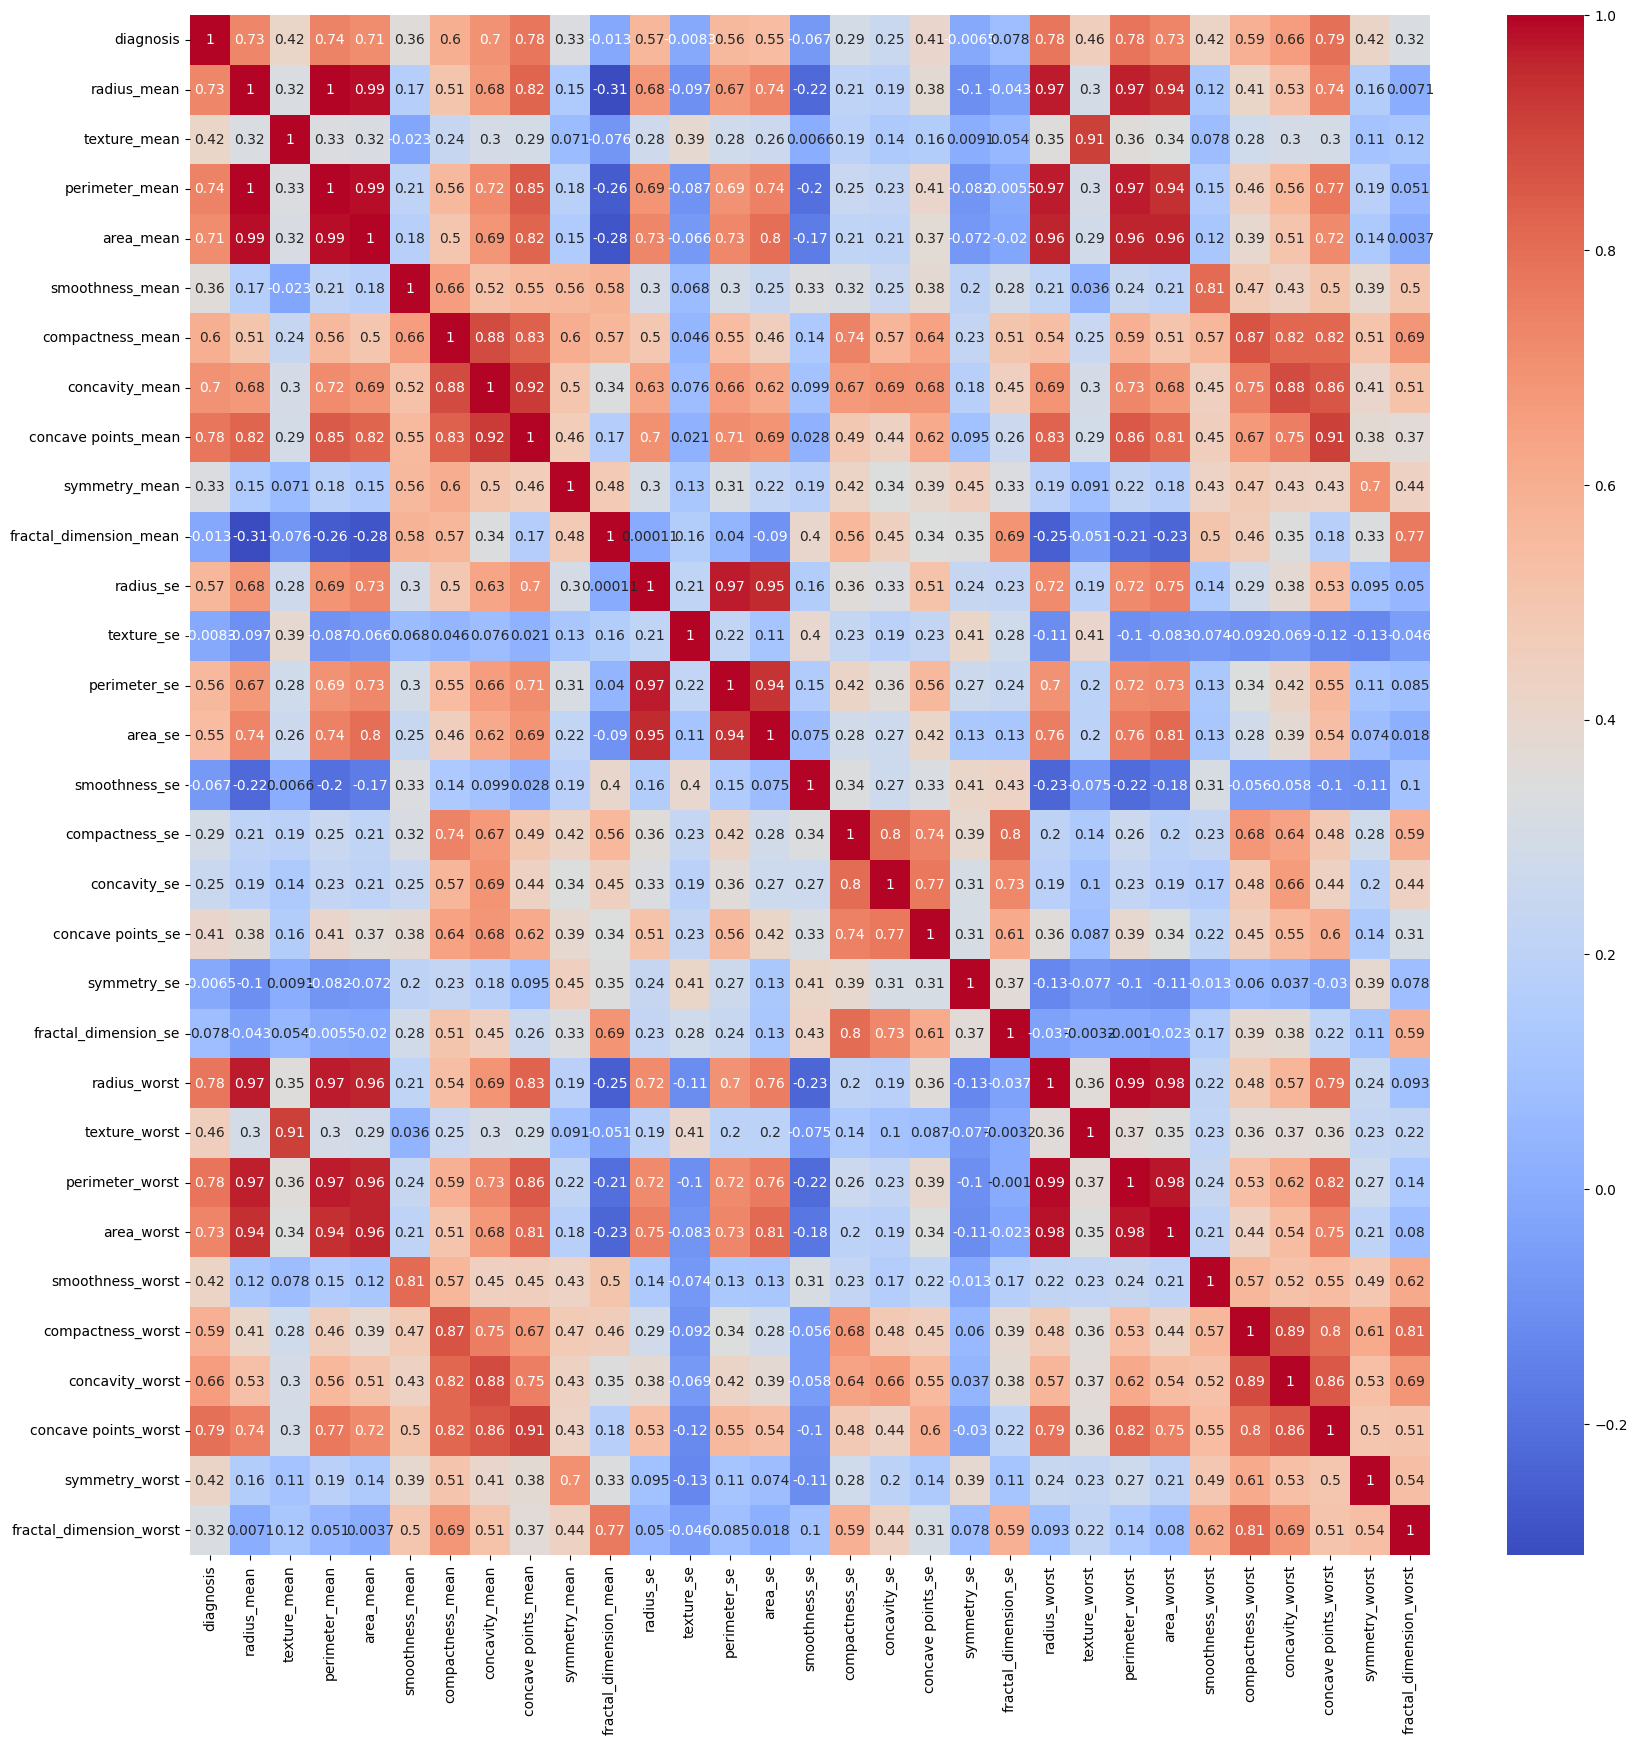

In [23]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Create a heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [24]:
#identfying less correlation in the dataset
data.corr().diagnosis[data.corr().diagnosis<=0.2]

fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64

In [25]:

less_corr = data.corr().diagnosis[data.corr().diagnosis<=0.2].index

In [26]:
#dropping less_corr
data=data.drop(less_corr,axis=1)

In [27]:
#viewing the shape of the dataset
data.shape

(569, 26)

In [28]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
stand_scale= data.drop(['diagnosis'],axis=1)
col_trans= make_column_transformer((StandardScaler(),stand_scale.columns),remainder='passthrough')

###  Train  Test    Split

In [29]:
# train and test the dataset
from sklearn.model_selection import train_test_split
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [30]:
#transforming the data
col_trans.fit_transform(xtrain)

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

##  Classification  Models

### 1. Logistic Regression

In [31]:
# importing the model  LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
lorg=LogisticRegression(solver='lbfgs')
pipe = make_pipeline(col_trans,lorg)

In [32]:
from sklearn.model_selection import cross_val_score
print('Accuracy score on train data:{}'.format(cross_val_score(pipe, xtrain, ytrain, cv=10, scoring='accuracy').mean()*100))

Accuracy score on train data:97.58937198067633


In [33]:
pipe=make_pipeline(col_trans,lorg)
pipe.fit(xtrain,ytrain)
ypredict=pipe.predict(xtest)
from sklearn import metrics
print('Accuring score on the test data:{}'.format(metrics.accuracy_score(ytest,ypredict)*100))

Accuring score on the test data:97.36842105263158


### 2. K Neighbors Classifier

In [34]:
# importing the model KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    pipe = make_pipeline(col_trans,knn_classifier)
    knn_scores.append(cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

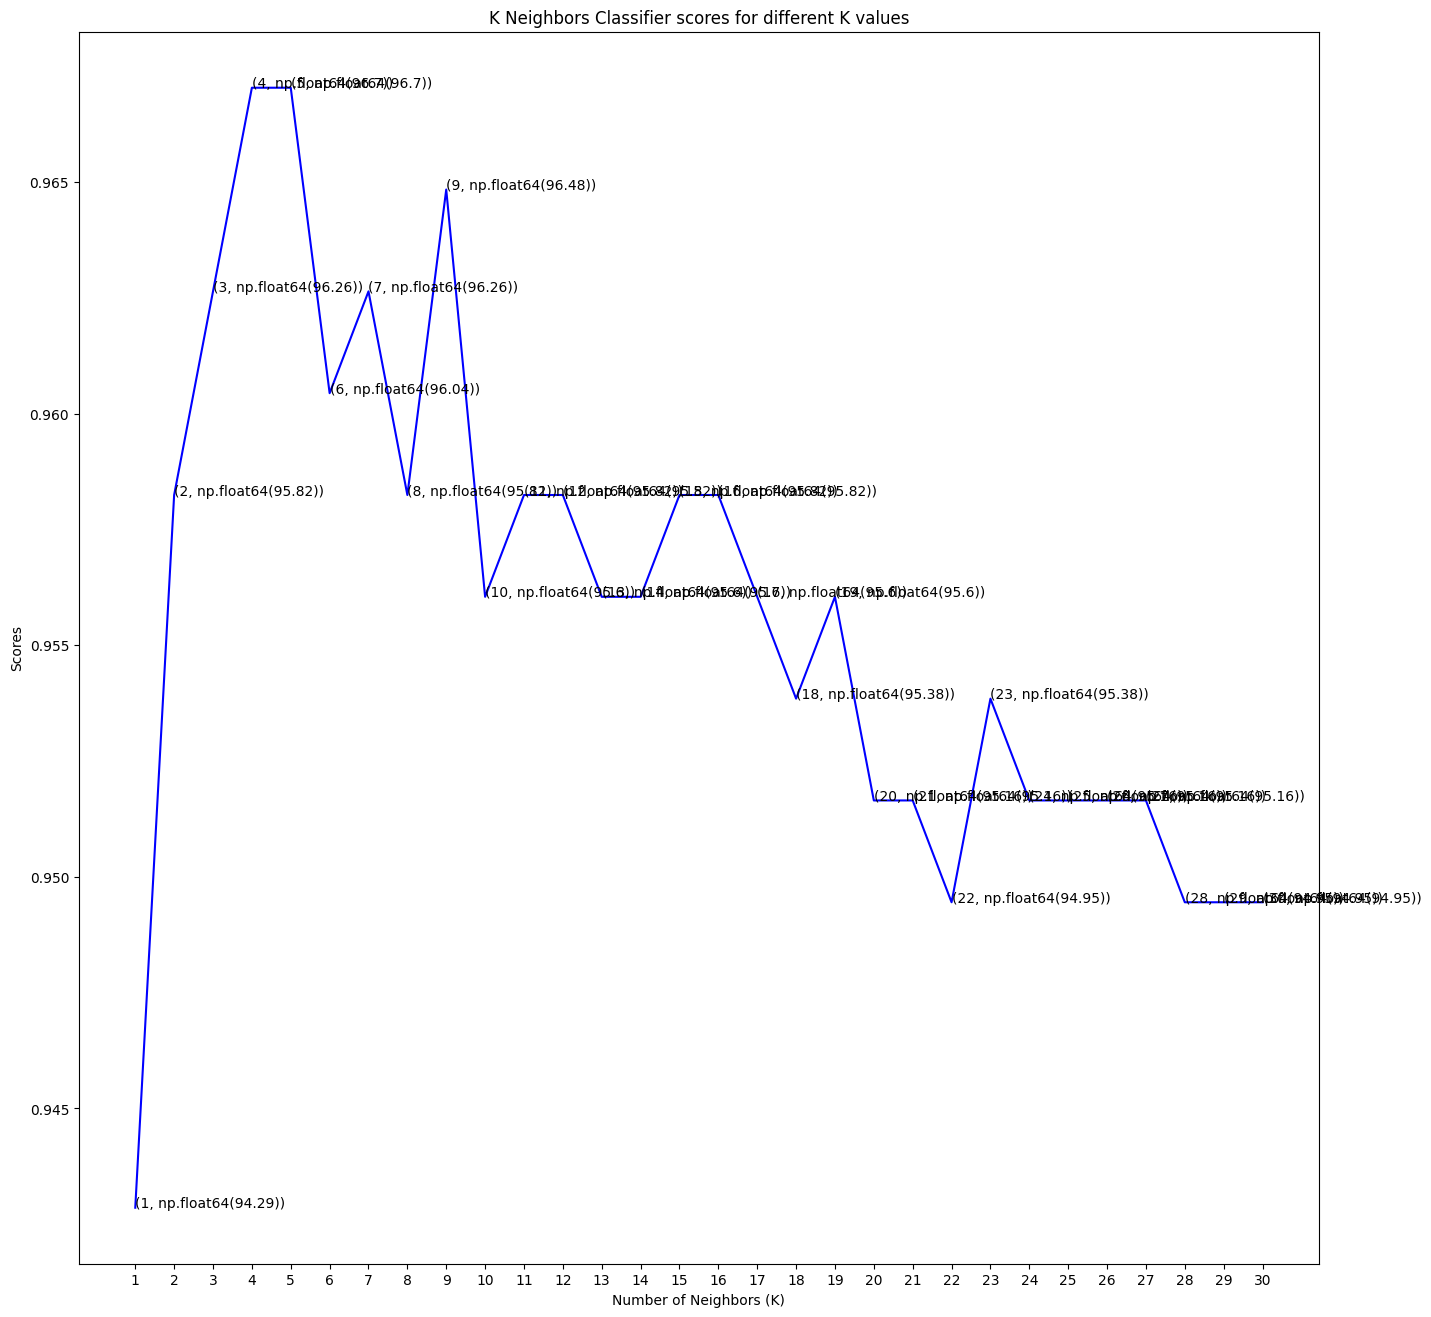

In [35]:
# plotting the graph of this model
plt.figure(figsize=(16,16))
plt.plot([k for k in range (1,31)],knn_scores,color ='blue')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [36]:
print('Accuracy score on Train data:{}'.format(knn_scores[4]*100))

Accuracy score on Train data:96.70329670329669


In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4)
pipe = make_pipeline(col_trans,knn_classifier)
pipe.fit(xtrain, ytrain)
y_pred = pipe.predict(xtest)
print('Accuracy score on Test Data: {}'.format(metrics.accuracy_score(ytest,y_pred)*100))

Accuracy score on Test Data: 94.73684210526315


###  3. Support  Vector  Classifier(SVC)

In [38]:
#importing the model SVC
from sklearn.svm import SVC
svc_scores=[]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    pipe = make_pipeline(col_trans,svc_classifier)
    svc_scores.append(cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

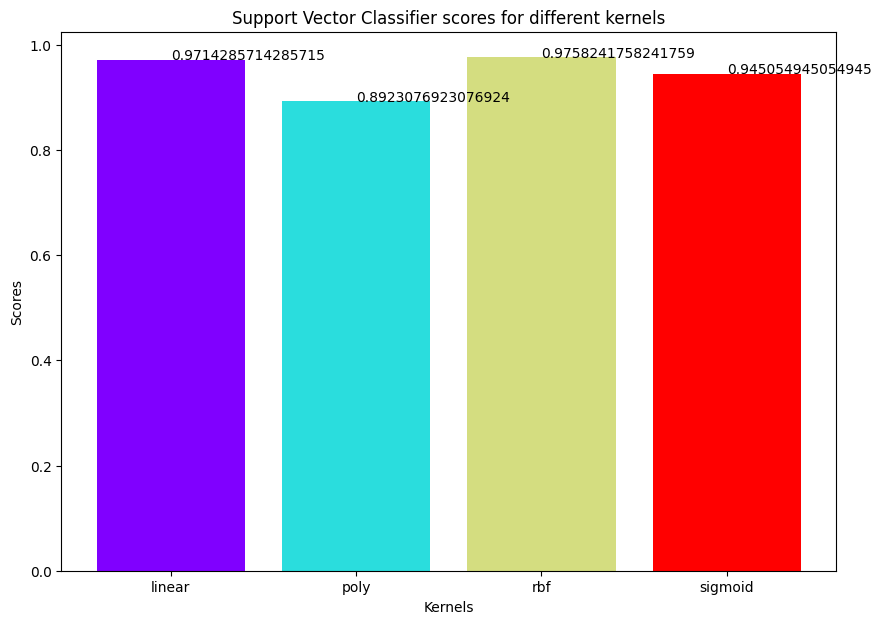

In [39]:
#plotting the graph of this model 
from matplotlib.cm import rainbow
import numpy as np
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [40]:
print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

Accuracy score on Train data: 97.58241758241759


In [41]:
svc_classifier = SVC(kernel = 'rbf')
pipe = make_pipeline(col_trans,svc_classifier)
pipe.fit(xtrain, ytrain)
y_pred = pipe.predict(xtest)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(ytest,y_pred)*100))

Accuracy score on Test data: 96.49122807017544


###  4.Decision Tree Classifier

In [42]:
#importing the model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_scores=[]
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    pipe = make_pipeline(col_trans,dt_classifier)
    dt_scores.append(cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum  features ')

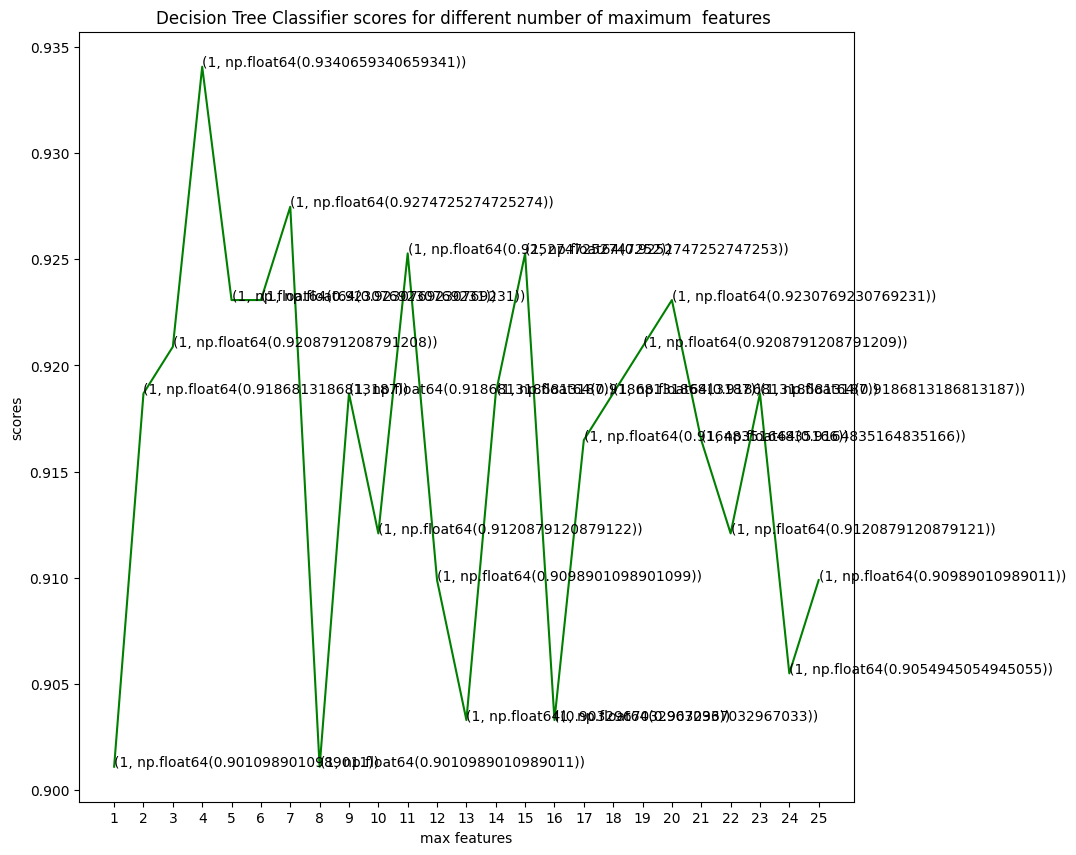

In [43]:
#plotting the graph of this model
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1,len(x.columns)+1):
    plt.text(i,dt_scores[i-1],(1,dt_scores[i-1]))
plt.xticks([i for i in range(1,len(x.columns)+1)])
plt.xlabel("max features")
plt.ylabel("scores")
plt.title("Decision Tree Classifier scores for different number of maximum  features ")

In [44]:
print("Accuracy on Train data: {}".format(dt_scores[3]*100))

Accuracy on Train data: 93.4065934065934


In [45]:
dt_classifier=DecisionTreeClassifier(max_features=4,random_state=0)
pipe = make_pipeline(col_trans,dt_classifier)
pipe.fit(xtrain,ytrain)
y_pred = pipe.predict(xtest)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(ytest,y_pred)*100))

Accuracy score on Test data: 94.73684210526315


###  5.Random Forest Classifier

In [46]:
#importing the model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_scores=[]
estimators=[10,100,200,500,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    pipe = make_pipeline(col_trans,rf_classifier)
    rf_scores.append(cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

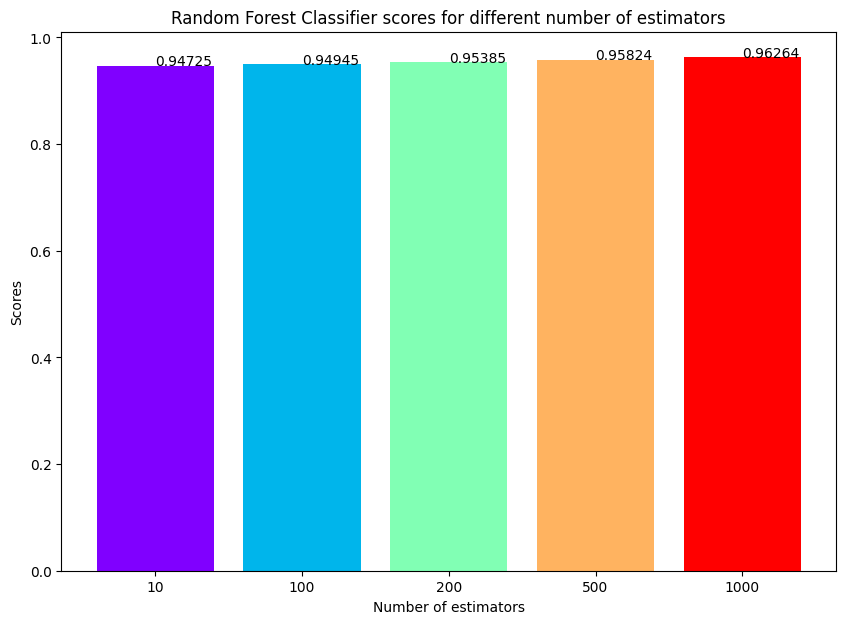

In [47]:
#plotting the graph of this model
plt.figure(figsize=(10,7))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],5))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [48]:
print('Accuracy on Train data: {}'.format(dt_scores[4]*100))

Accuracy on Train data: 92.3076923076923


In [49]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)
pipe=make_pipeline(col_trans,rf_classifier)
pipe.fit(xtrain,ytrain)
y_pred=pipe.predict(xtest)
print('Accuracy on test data: {}'.format(metrics.accuracy_score(ytest,y_pred)*100))

Accuracy on test data: 95.6140350877193


Logisitc Regression performed well compared with other models. Let's run our model using Logistic Regression and have a look at its confusion matrix

In [50]:
pipe=make_pipeline(col_trans,lorg)
pipe.fit(xtrain,ytrain)
y_pred=pipe.predict(xtest)

In [51]:
print('confusion matrix- training set')
print(pd.crosstab(ytrain,pipe.predict(xtrain),rownames=['True'],colnames=['Predicted'],margins=True))

confusion matrix- training set
Predicted    0    1  All
True                    
0          289    1  290
1            4  161  165
All        293  162  455


Let's check our False Negative rate which makes sense especially in health care field.

In [52]:
4/165

0.024242424242424242

Around 2.42% of observations are misclassified as Benign which actually is Malignant

Let's take a look at confusion matrix in out testing dataset

In [53]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(ytest, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted   0   1  All
True                  
0          66   1   67
1           2  45   47
All        68  46  114


In [54]:
2/47

0.0425531914893617

4.25% of observations in testing data are misclassified as Benign

You can improve the performance of the model to some more extent by performing Hyper parameter tuning in KNN, Random forest, etc. and append it to the pipeline model and test the model.